In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDS/healthcare_noshows_appointments.csv')
print(df.info())  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB
None


In [ ]:
df.shape

(106987, 15)

In [ ]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Days_Diff
0,0,62,39,0,1,0,0,0,0,1,0,0
1,1,56,39,0,0,0,0,0,0,1,0,0
2,0,62,45,0,0,0,0,0,0,1,0,0
3,0,8,54,0,0,0,0,0,0,1,0,0
4,0,56,39,0,1,1,0,0,0,1,0,0


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

# Check Null

In [ ]:
# Check for missing values
print(df.isnull().sum())


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


# Convert Category to Numerical values

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDS/healthcare_noshows_appointments.csv')

# Convert Gender to numerical (0 for 'F', 1 for 'M')
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Convert ScheduledDay and AppointmentDay to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate the difference in days between ScheduledDay and AppointmentDay
df['Days_Diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Drop the original datetime columns as we've extracted the information needed
df.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

# Label encode the Neighbourhood column
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

# Map True/False columns to 1/0
boolean_columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']
for col in boolean_columns:
    df[col] = df[col].astype(int)

# Drop 'PatientId' and 'AppointmentID' if they're not necessary for analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Save the transformed data to a new CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/IDS/healthcare_noshows_appointments_numerical.csv', index=False)

print("Data processing complete. Transformed data saved to 'healthcare_noshows_appointments_numerical.csv'.")
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDS/healthcare_noshows_appointments_numerical.csv')
print(data['Showed_up'])

Data processing complete. Transformed data saved to 'healthcare_noshows_appointments_numerical.csv'.
0         1
1         1
2         1
3         1
4         1
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: Showed_up, Length: 106987, dtype: int64


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDS/healthcare_noshows_appointments_numerical.csv')

In [ ]:
data.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Days_Diff
0,0,62,39,0,1,0,0,0,0,1,0,0
1,1,56,39,0,0,0,0,0,0,1,0,0
2,0,62,45,0,0,0,0,0,0,1,0,0
3,0,8,54,0,0,0,0,0,0,1,0,0
4,0,56,39,0,1,1,0,0,0,1,0,0
5,0,76,58,0,1,0,0,0,0,1,2,2
6,0,23,25,0,0,0,0,0,0,0,2,2
7,0,39,25,0,0,0,0,0,0,0,2,2
8,0,21,1,0,0,0,0,0,0,1,0,0
9,0,19,12,0,0,0,0,0,0,1,2,2


In [ ]:
print(data['Showed_up'])

0         1
1         1
2         1
3         1
4         1
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: Showed_up, Length: 106987, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Gender         106987 non-null  int64
 1   Age            106987 non-null  int64
 2   Neighbourhood  106987 non-null  int64
 3   Scholarship    106987 non-null  int64
 4   Hipertension   106987 non-null  int64
 5   Diabetes       106987 non-null  int64
 6   Alcoholism     106987 non-null  int64
 7   Handcap        106987 non-null  int64
 8   SMS_received   106987 non-null  int64
 9   Showed_up      106987 non-null  int64
 10  Date.diff      106987 non-null  int64
 11  Days_Diff      106987 non-null  int64
dtypes: int64(12)
memory usage: 9.8 MB


In [ ]:
data.describe()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Days_Diff
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,0.344612,38.316085,41.662492,0.101031,0.203772,0.074243,0.031406,0.020937,0.323264,0.797359,10.166721,10.166721
std,0.475244,22.466214,22.351197,0.301371,0.402804,0.262167,0.174412,0.143175,0.467725,0.401969,15.263508,15.263508
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-6.000000
25%,0.000000,19.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,38.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000
75%,1.000000,56.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000,14.000000
max,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,179.000000


In [ ]:
data.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'Days_Diff'],
      dtype='object')

# Frequency PLot

Unique values in 'Gender':
  0: 70118
  1: 36869




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


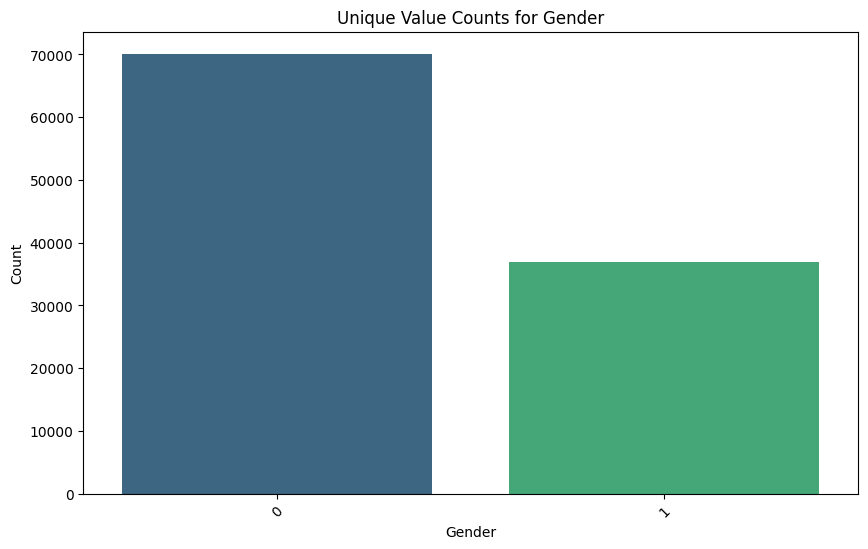

Unique values in 'Age':
  1: 2273
  52: 1746
  49: 1652
  53: 1651
  56: 1635
  38: 1629
  59: 1624
  2: 1618
  50: 1613
  57: 1603
  36: 1580
  51: 1567
  19: 1545
  39: 1536
  37: 1533
  54: 1530
  34: 1526
  33: 1524
  30: 1521
  6: 1521
  3: 1513
  17: 1509
  32: 1505
  5: 1489
  44: 1487
  18: 1487
  58: 1469
  46: 1460
  45: 1453
  21: 1452
  28: 1448
  31: 1439
  20: 1437
  7: 1427
  55: 1425
  8: 1424
  60: 1411
  29: 1403
  40: 1402
  16: 1402
  48: 1399
  47: 1394
  35: 1378
  27: 1377
  22: 1376
  63: 1374
  9: 1372
  23: 1349
  41: 1346
  43: 1344
  61: 1343
  25: 1332
  64: 1331
  62: 1312
  4: 1299
  26: 1283
  10: 1274
  42: 1272
  24: 1242
  15: 1211
  11: 1195
  66: 1187
  14: 1118
  13: 1103
  65: 1101
  12: 1092
  68: 1012
  67: 973
  69: 832
  73: 725
  70: 724
  71: 695
  72: 615
  74: 602
  76: 571
  75: 544
  78: 541
  77: 527
  80: 511
  81: 434
  82: 392
  79: 390
  84: 311
  83: 280
  85: 275
  86: 260
  87: 184
  89: 173
  88: 126
  90: 109
  92: 86
  91: 66


<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


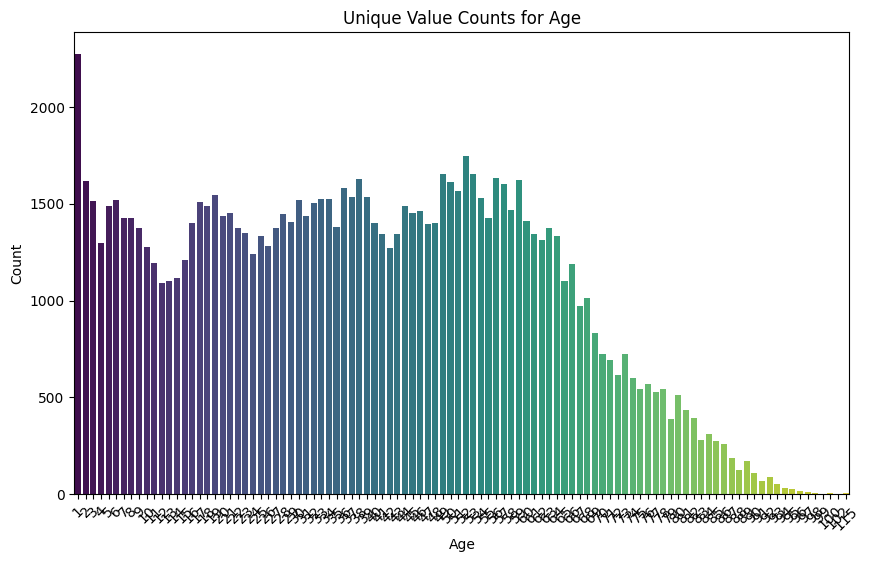

Unique values in 'Neighbourhood':
  38: 7586
  43: 5563
  59: 4235
  39: 3851
  36: 3412
  10: 3282
  66: 3041
  78: 3019
  40: 2719
  8: 2700
  69: 2673
  9: 2489
  68: 2458
  37: 2396
  77: 2346
  33: 2222
  1: 2195
  15: 2155
  50: 2147
  60: 2126
  27: 1905
  76: 1868
  44: 1865
  5: 1834
  30: 1823
  23: 1809
  75: 1785
  57: 1491
  41: 1358
  14: 1357
  74: 1351
  13: 1327
  56: 1259
  67: 1259
  70: 1249
  26: 1061
  55: 1030
  29: 1020
  35: 997
  6: 849
  80: 829
  19: 823
  58: 815
  12: 810
  52: 791
  46: 779
  25: 686
  42: 681
  22: 667
  45: 642
  17: 536
  21: 534
  71: 520
  62: 496
  73: 452
  61: 443
  53: 435
  65: 434
  64: 419
  4: 418
  18: 395
  48: 367
  11: 308
  7: 305
  16: 300
  3: 268
  2: 257
  24: 254
  20: 229
  63: 174
  28: 166
  79: 151
  72: 140
  49: 132
  47: 94
  54: 69
  31: 35
  32: 10
  0: 8
  34: 2
  51: 1




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


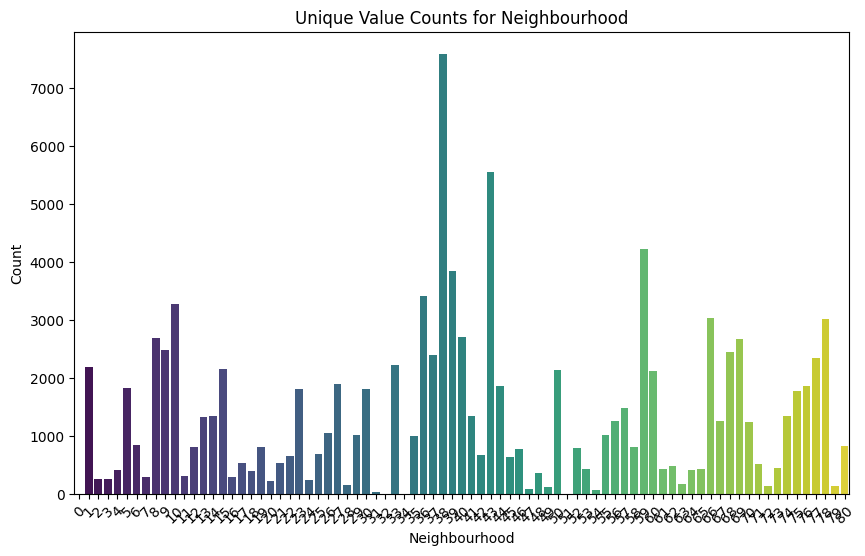

Unique values in 'Scholarship':
  0: 96178
  1: 10809




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


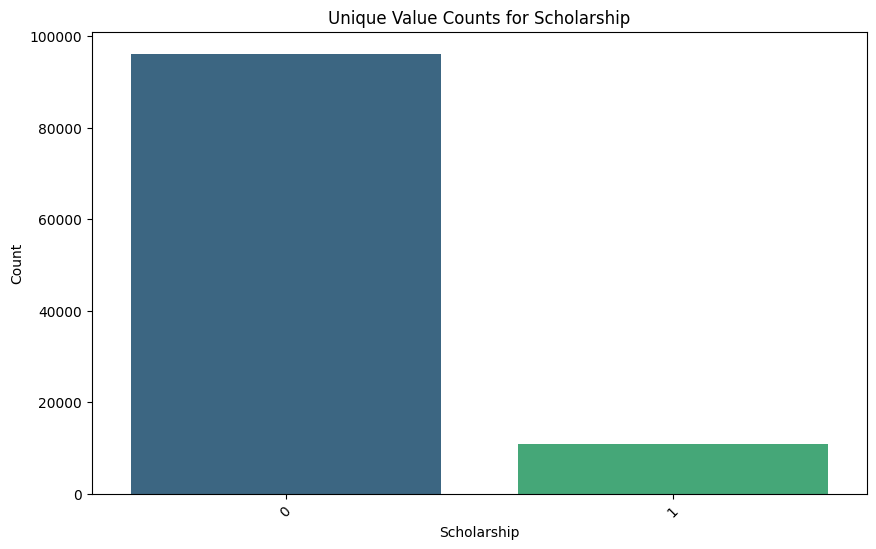

Unique values in 'Hipertension':
  0: 85186
  1: 21801




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


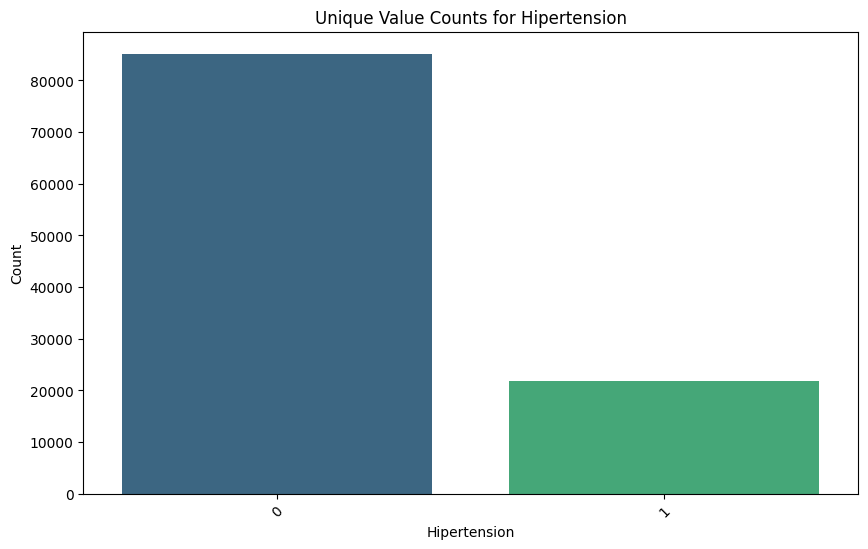

Unique values in 'Diabetes':
  0: 99044
  1: 7943




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


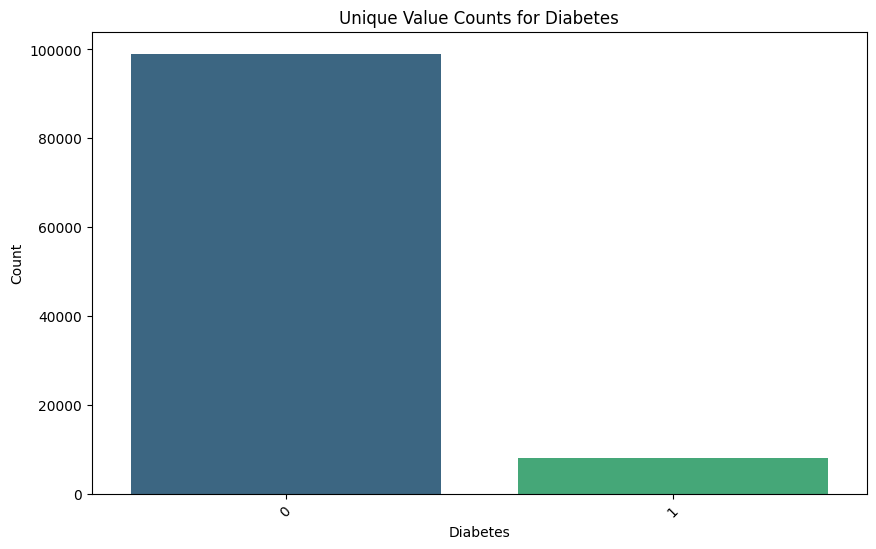

Unique values in 'Alcoholism':
  0: 103627
  1: 3360




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


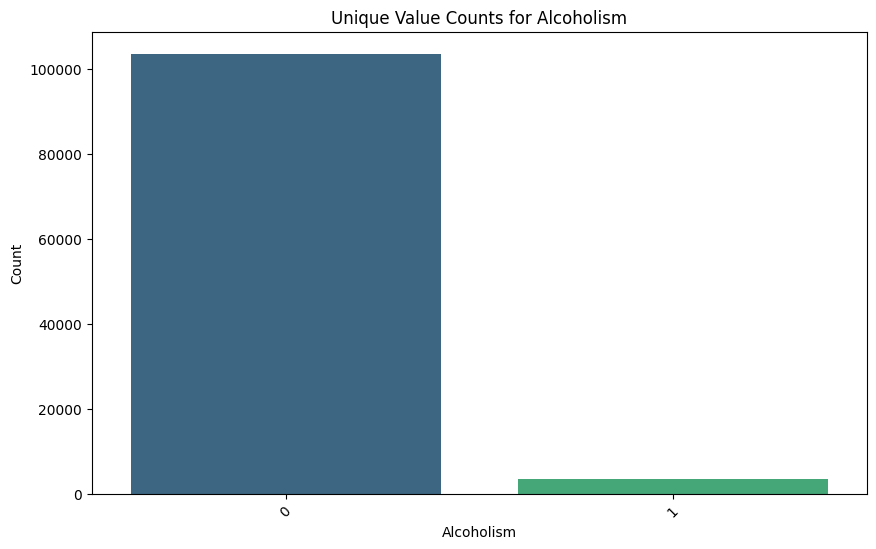

Unique values in 'Handcap':
  0: 104747
  1: 2240




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


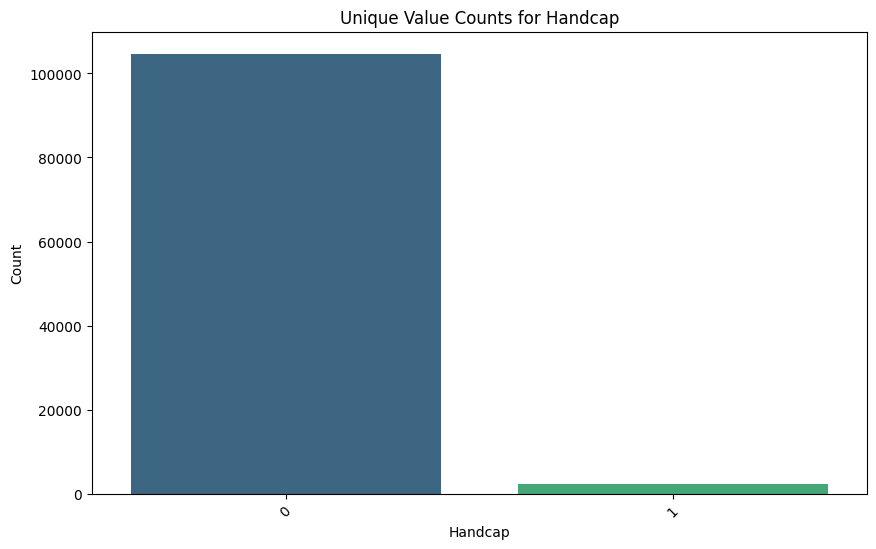

Unique values in 'SMS_received':
  0: 72402
  1: 34585




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


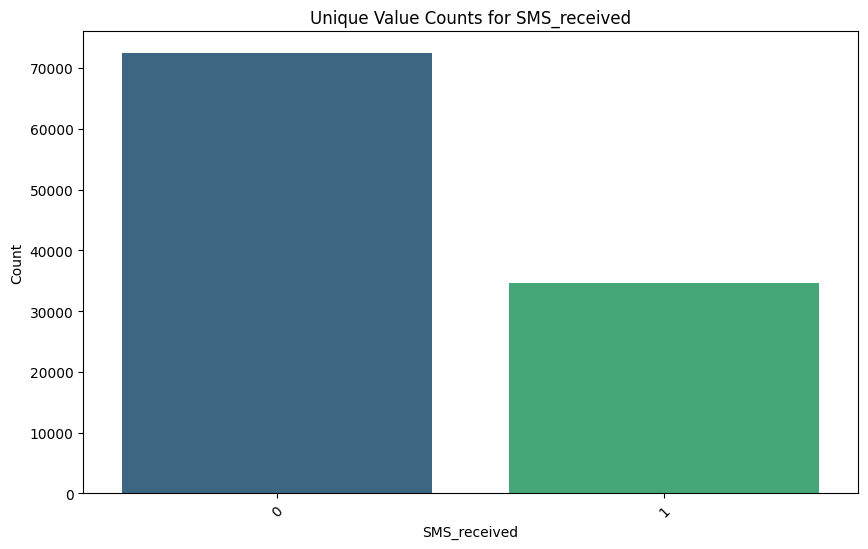

Unique values in 'Showed_up':
  1: 85307
  0: 21680




<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


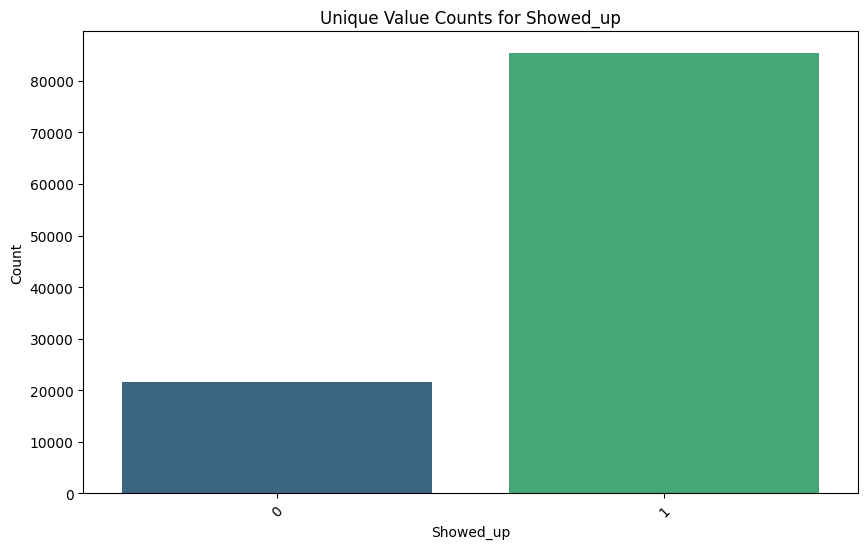

Unique values in 'Date.diff':
  0: 37154
  2: 6636
  4: 5212
  1: 5028
  7: 4785
  6: 3950
  5: 3196
  14: 2813
  3: 2639
  8: 2248
  21: 1789
  13: 1622
  28: 1618
  9: 1563
  15: 1441
  10: 1360
  20: 1151
  22: 1137
  16: 1111
  12: 1083
  17: 1077
  29: 1040
  19: 1012
  18: 1002
  27: 980
  11: 955
  35: 910
  23: 790
  34: 772
  26: 712
  30: 651
  31: 633
  33: 632
  25: 623
  24: 608
  32: 560
  36: 538
  42: 398
  41: 335
  37: 324
  40: 248
  43: 245
  49: 210
  38: 193
  62: 189
  63: 188
  56: 185
  50: 181
  39: 163
  66: 161
  44: 153
  61: 132
  45: 130
  46: 116
  48: 112
  70: 109
  47: 108
  55: 107
  58: 105
  69: 104
  53: 96
  65: 95
  57: 93
  51: 90
  59: 89
  52: 87
  64: 74
  60: 72
  75: 72
  68: 69
  54: 67
  76: 65
  67: 61
  90: 57
  91: 55
  84: 54
  71: 50
  77: 49
  72: 49
  74: 38
  73: 37
  85: 37
  78: 33
  79: 23
  80: 18
  89: 17
  176: 16
  87: 16
  88: 15
  162: 11
  133: 11
  179: 10
  155: 10
  81: 8
  142: 8
  169: 8
  104: 8
  86: 6
  108: 5
 

<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


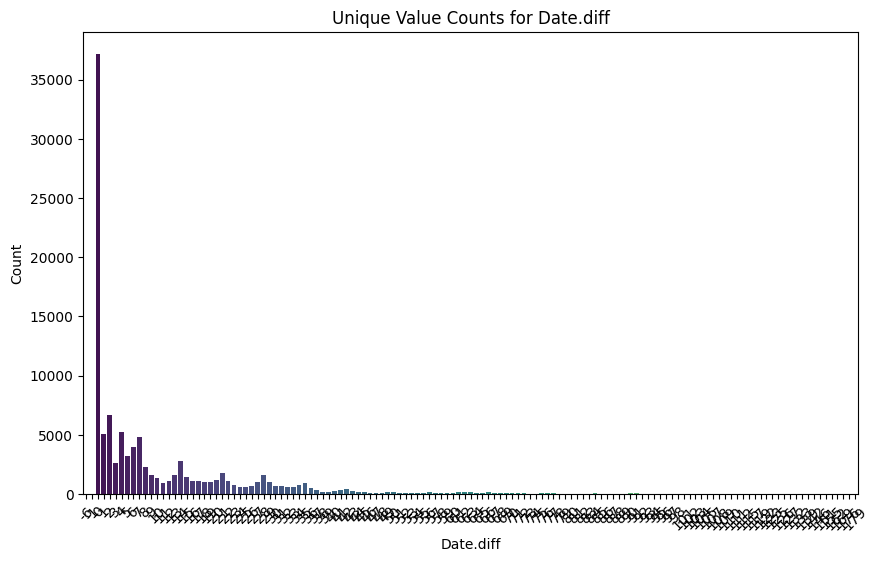

Unique values in 'Days_Diff':
  0: 37154
  2: 6636
  4: 5212
  1: 5028
  7: 4785
  6: 3950
  5: 3196
  14: 2813
  3: 2639
  8: 2248
  21: 1789
  13: 1622
  28: 1618
  9: 1563
  15: 1441
  10: 1360
  20: 1151
  22: 1137
  16: 1111
  12: 1083
  17: 1077
  29: 1040
  19: 1012
  18: 1002
  27: 980
  11: 955
  35: 910
  23: 790
  34: 772
  26: 712
  30: 651
  31: 633
  33: 632
  25: 623
  24: 608
  32: 560
  36: 538
  42: 398
  41: 335
  37: 324
  40: 248
  43: 245
  49: 210
  38: 193
  62: 189
  63: 188
  56: 185
  50: 181
  39: 163
  66: 161
  44: 153
  61: 132
  45: 130
  46: 116
  48: 112
  70: 109
  47: 108
  55: 107
  58: 105
  69: 104
  53: 96
  65: 95
  57: 93
  51: 90
  59: 89
  52: 87
  64: 74
  60: 72
  75: 72
  68: 69
  54: 67
  76: 65
  67: 61
  90: 57
  91: 55
  84: 54
  71: 50
  77: 49
  72: 49
  74: 38
  73: 37
  85: 37
  78: 33
  79: 23
  80: 18
  89: 17
  176: 16
  87: 16
  88: 15
  162: 11
  133: 11
  179: 10
  155: 10
  81: 8
  142: 8
  169: 8
  104: 8
  86: 6
  108: 5
 

<ipython-input-47-9536df5c221b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


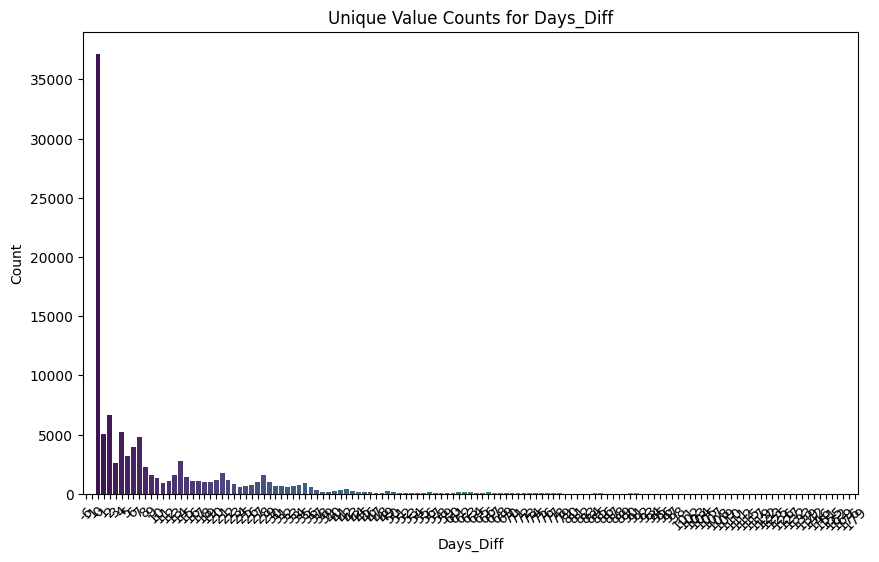

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to analyze
columns_to_check = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                    'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
                    'Date.diff', 'Days_Diff']

# Loop through each column, print the unique counts, and plot them
for col in columns_to_check:
    unique_counts = data[col].value_counts()

    # Print unique values in the desired format
    print(f"Unique values in '{col}':")
    for value, count in unique_counts.items():
        print(f"  {value}: {count}")
    print("\n")  # Blank line for better readability

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
    plt.title(f'Unique Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()




In [ ]:
# Check for missing values
print(data.isnull().sum())

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
Showed_up        0
Date.diff        0
Days_Diff        0
dtype: int64


In [ ]:
print(data['Showed_up'])

0         1
1         1
2         1
3         1
4         1
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: Showed_up, Length: 106987, dtype: int64


# Scatter Plot

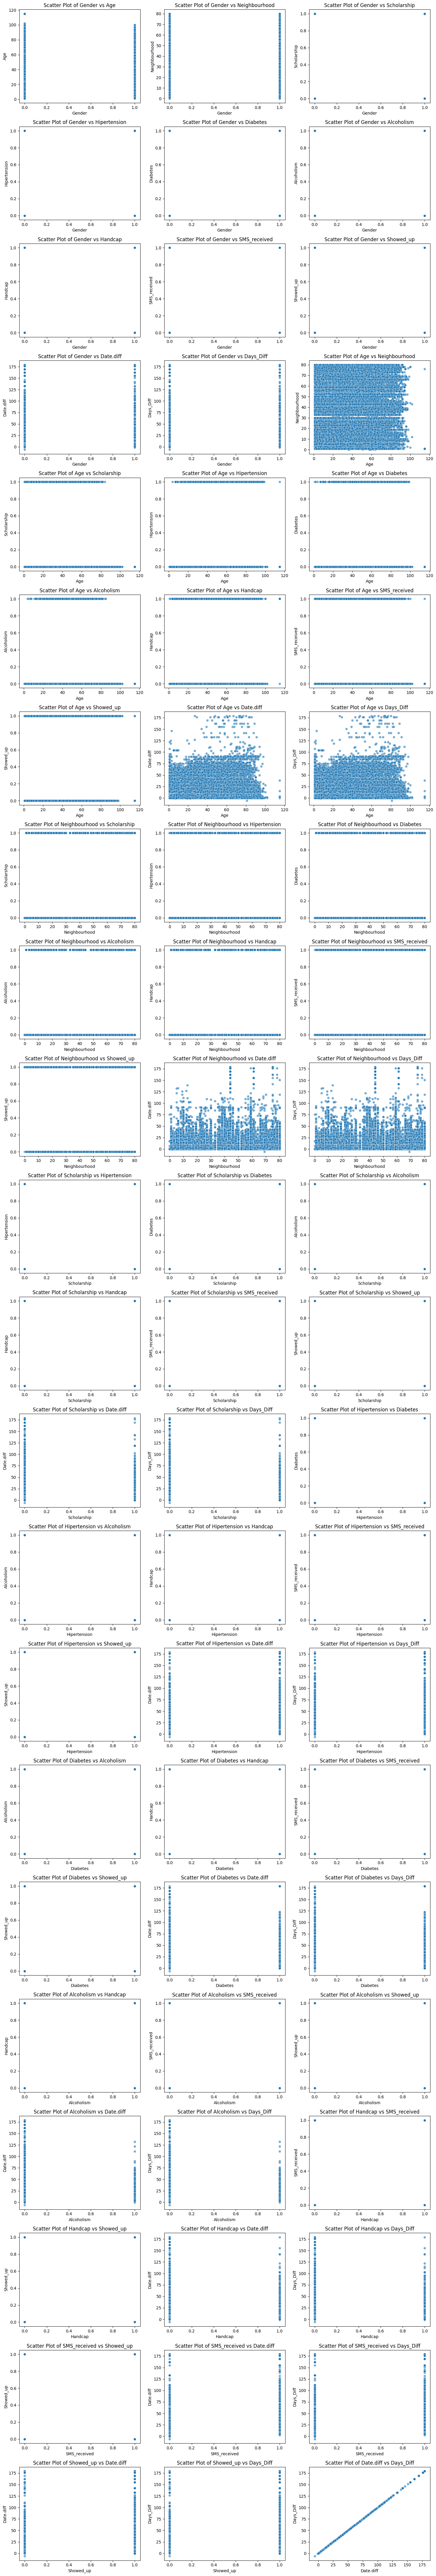

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Define the columns for the scatter plots
columns_to_plot = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                   'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
                   'Date.diff', 'Days_Diff']

# Calculate all pairs of columns
column_pairs = list(itertools.combinations(columns_to_plot, 2))

# Define the grid layout for the plots (adjust rows and columns as needed)
num_plots = len(column_pairs)
num_cols = 3  # Number of columns for the grid layout
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Set up the figure for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Loop through each pair of columns and create a scatter plot
for i, (col_x, col_y) in enumerate(column_pairs):
    sns.scatterplot(data=data, x=col_x, y=col_y, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Scatter Plot of {col_x} vs {col_y}')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
print(data['Showed_up'])

0         1
1         1
2         1
3         1
4         1
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: Showed_up, Length: 106987, dtype: int64


# Box Plot

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


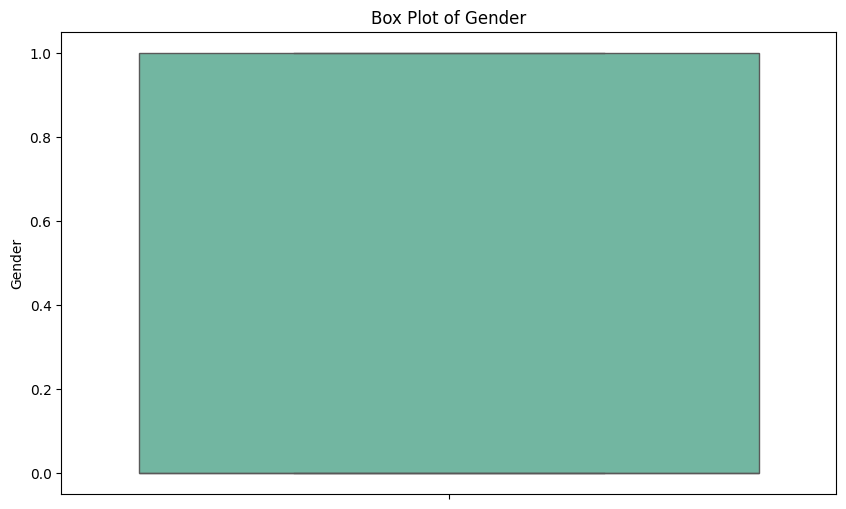

<ipython-input-52-e27abeafcf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, x='Showed_up', palette="Set3")  # Use 'Showed_up' for grouping


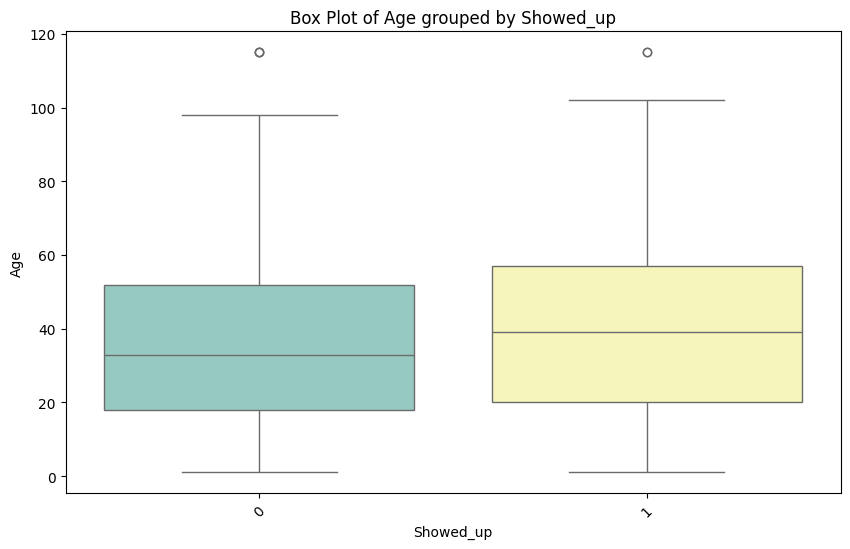

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


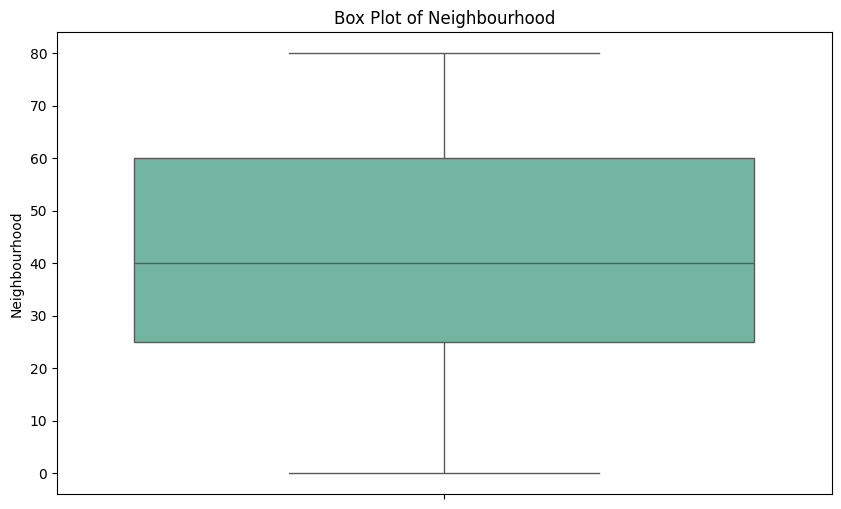

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


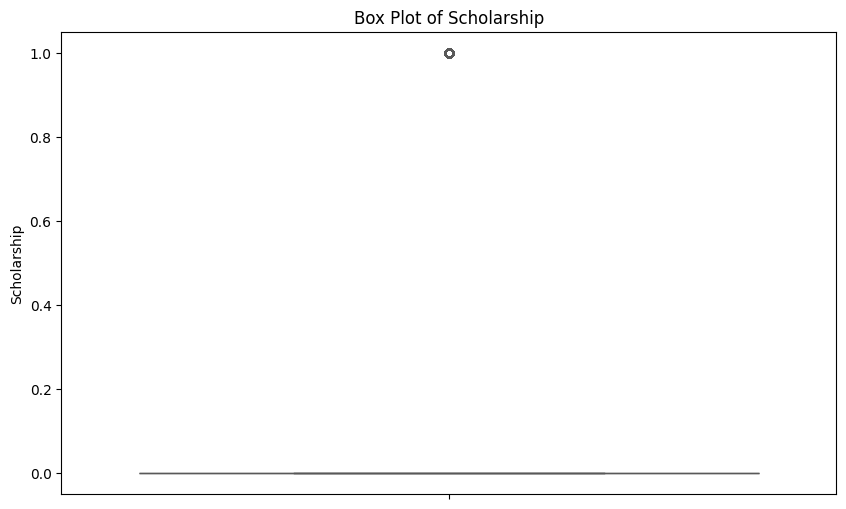

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


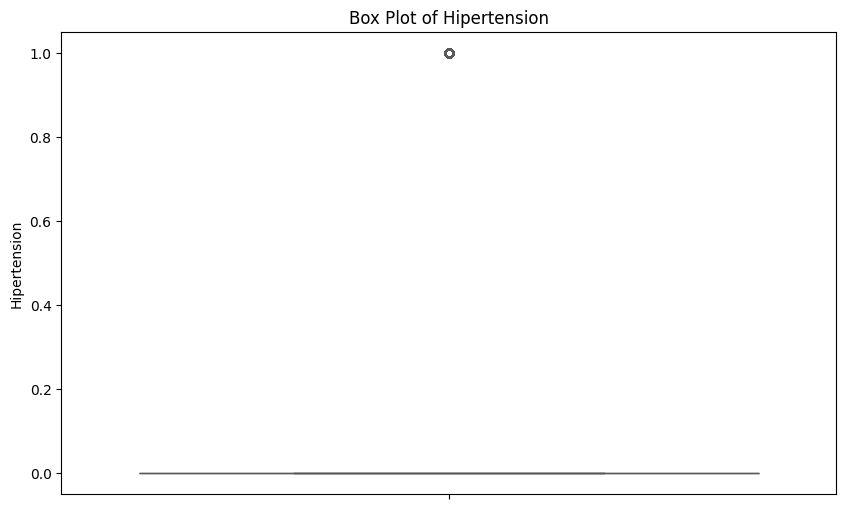

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


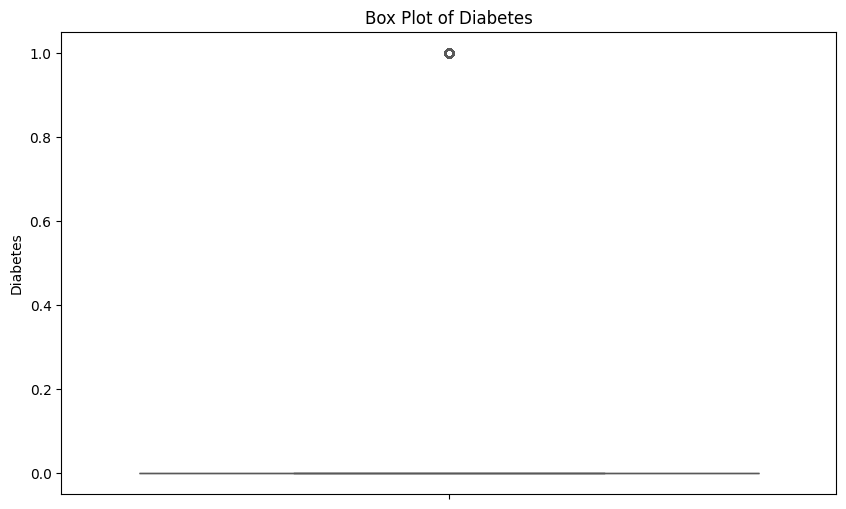

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


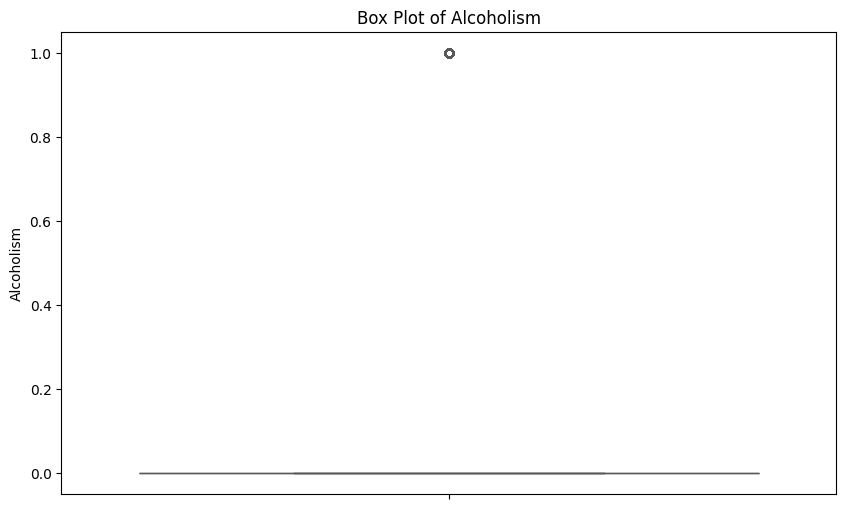

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


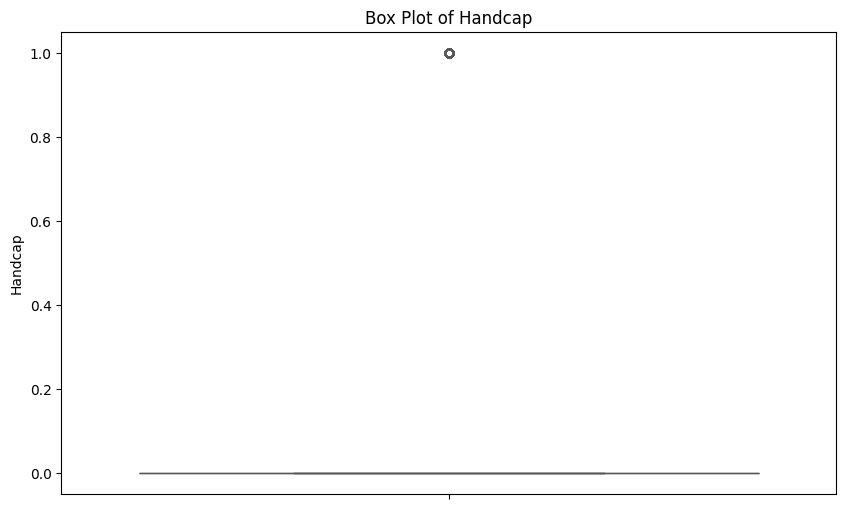

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


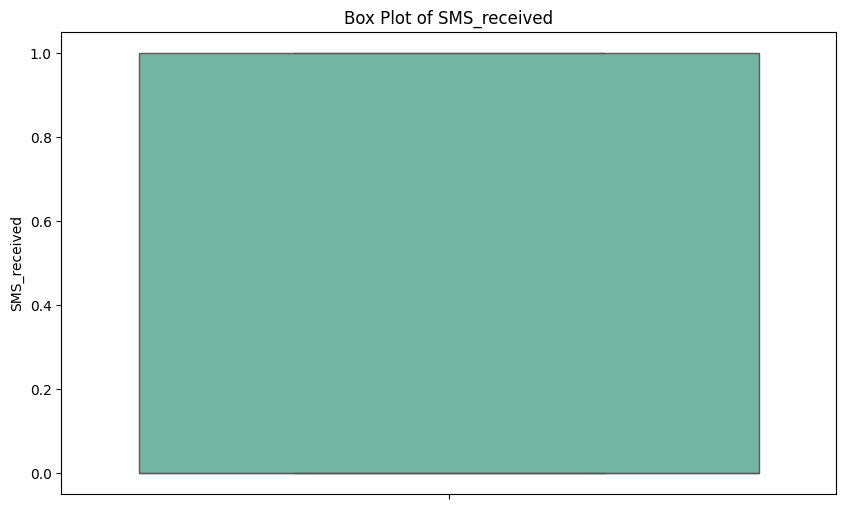

<ipython-input-52-e27abeafcf01>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")


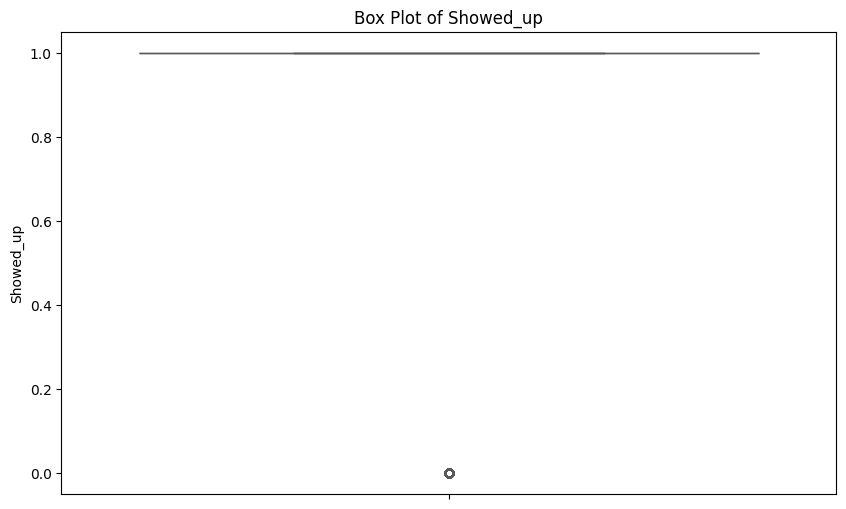

<ipython-input-52-e27abeafcf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, x='Showed_up', palette="Set3")  # Use 'Showed_up' for grouping


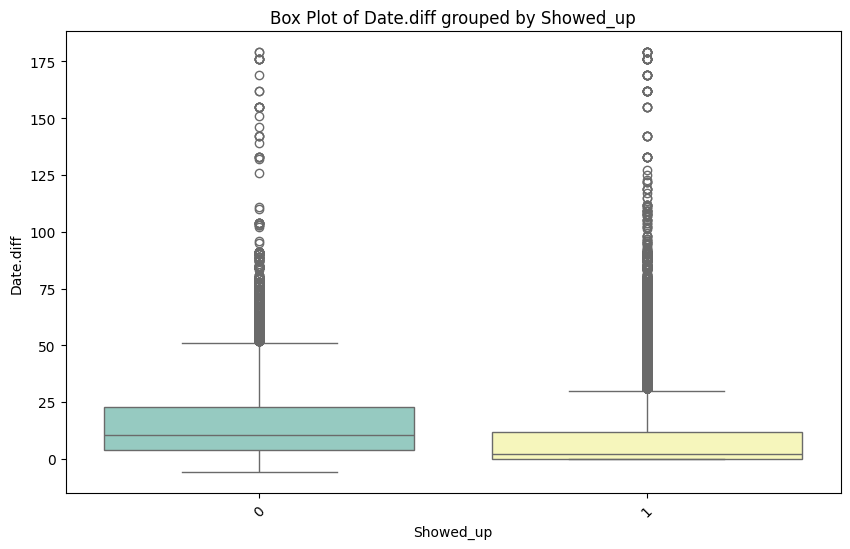

<ipython-input-52-e27abeafcf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, x='Showed_up', palette="Set3")  # Use 'Showed_up' for grouping


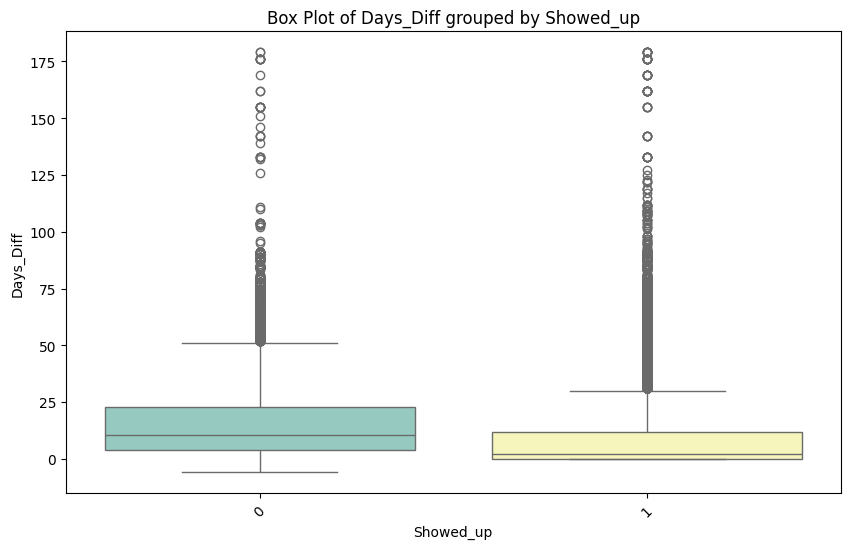

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                   'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
                   'Date.diff', 'Days_Diff']

# Plotting each column as a box plot
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))

    # Box plot for categorical data against continuous data
    if col in ['Age', 'Date.diff', 'Days_Diff']:  # Assuming these columns are continuous
        sns.boxplot(data=data, y=col, x='Showed_up', palette="Set3")  # Use 'Showed_up' for grouping
        plt.title(f'Box Plot of {col} grouped by Showed_up')
        plt.xlabel("Showed_up")
        plt.ylabel(col)
    else:
        # For categorical or binary columns, we can create a box plot using their distributions
        sns.boxplot(data=data, y=col, palette="Set2")
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)

    plt.xticks(rotation=45)
    plt.show()

# Correlation and Heat map

Correlation Matrix:
                 Gender       Age  Neighbourhood  Scholarship  Hipertension  \
Gender         1.000000 -0.094108      -0.008752    -0.113679     -0.051312   
Age           -0.094108  1.000000      -0.011685    -0.112699      0.502091   
Neighbourhood -0.008752 -0.011685       1.000000     0.007543      0.006107   
Scholarship   -0.113679 -0.112699       0.007543     1.000000     -0.024530   
Hipertension  -0.051312  0.502091       0.006107    -0.024530      1.000000   
Diabetes      -0.030027  0.290631       0.012501    -0.027622      0.430827   
Alcoholism     0.110410  0.090391       0.000592     0.033527      0.085459   
Handcap        0.024599  0.079726       0.010404    -0.010465      0.082909   
SMS_received  -0.045852  0.005251       0.018917    -0.000010     -0.008805   
Showed_up      0.003238  0.067025       0.008206    -0.029370      0.037280   
Date.diff     -0.030505  0.038880      -0.003131    -0.030439     -0.016996   
Days_Diff     -0.030505  0.03888

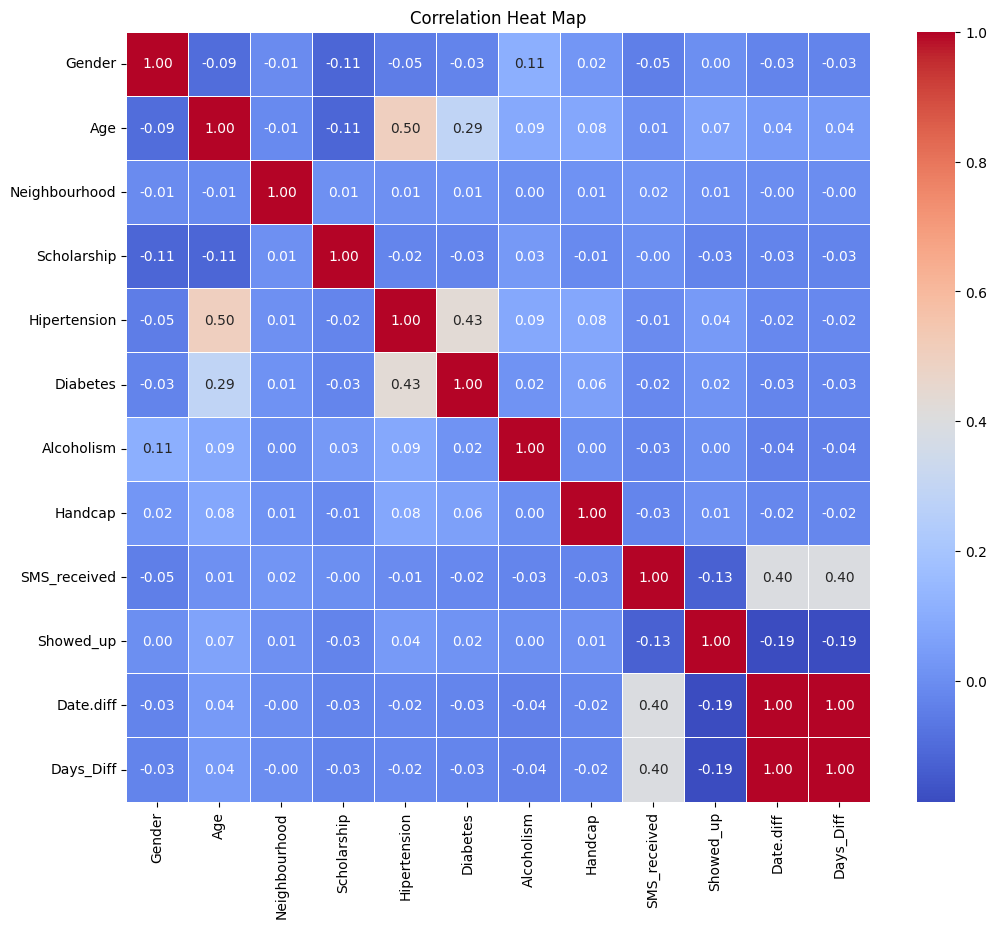

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Generate a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()


# Importance Features

In [ ]:
target_column = data['Showed_up']
print(target_column)

0         1
1         1
2         1
3         1
4         1
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: Showed_up, Length: 106987, dtype: int64


Feature Importances:
          Feature  Importance
1             Age    0.339029
2   Neighbourhood    0.323456
10      Days_Diff    0.137582
9       Date.diff    0.125448
0          Gender    0.022478
8    SMS_received    0.014228
3     Scholarship    0.010068
4    Hipertension    0.008953
5        Diabetes    0.007496
6      Alcoholism    0.005701
7         Handcap    0.005561


<ipython-input-55-d520355e7270>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


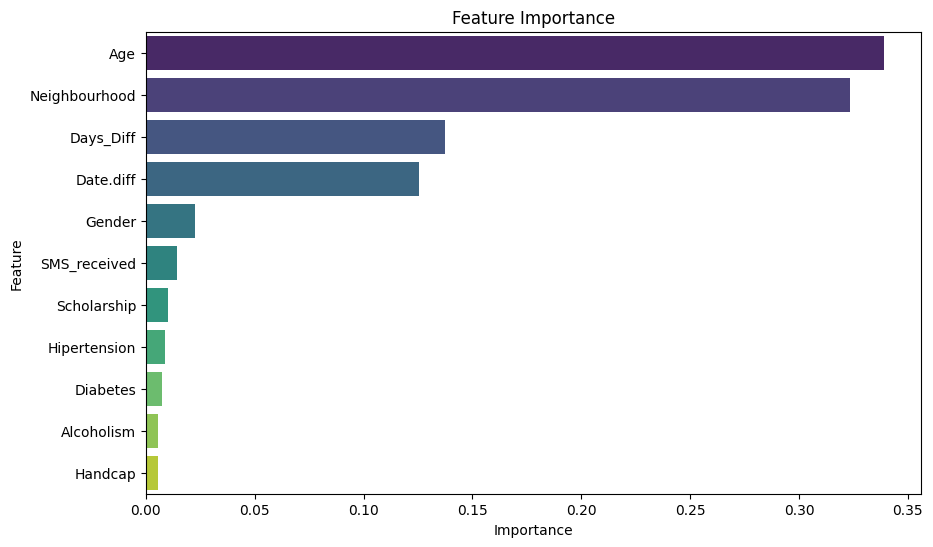

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Define feature columns and target variable
feature_columns = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                   'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Date.diff', 'Days_Diff']
target_column = 'Showed_up'

# Prepare the data by encoding categorical features and scaling
data_encoded = data.copy()
data_encoded['Gender'] = LabelEncoder().fit_transform(data_encoded['Gender'])
data_encoded['Neighbourhood'] = LabelEncoder().fit_transform(data_encoded['Neighbourhood'])

X = data_encoded[feature_columns]
y = data_encoded['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


# Gaussian Naive Bayes model

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.7581, Validation Accuracy = 0.7591
Fold 2: Train Accuracy = 0.7576, Validation Accuracy = 0.7596
Fold 3: Train Accuracy = 0.7588, Validation Accuracy = 0.7524
Fold 4: Train Accuracy = 0.7583, Validation Accuracy = 0.7579
Fold 5: Train Accuracy = 0.7582, Validation Accuracy = 0.7543
Fold 6: Train Accuracy = 0.7575, Validation Accuracy = 0.7639
Fold 7: Train Accuracy = 0.7588, Validation Accuracy = 0.7606
Fold 8: Train Accuracy = 0.7577, Validation Accuracy = 0.7592
Fold 9: Train Accuracy = 0.7585, Validation Accuracy = 0.7560
Fold 10: Train Accuracy = 0.7581, Validation Accuracy = 0.7591

Final Test Accuracy: 0.7558650341153379

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24      4325
           1       0.81      0.90      0.85     17073

    accuracy                           0.76     21398


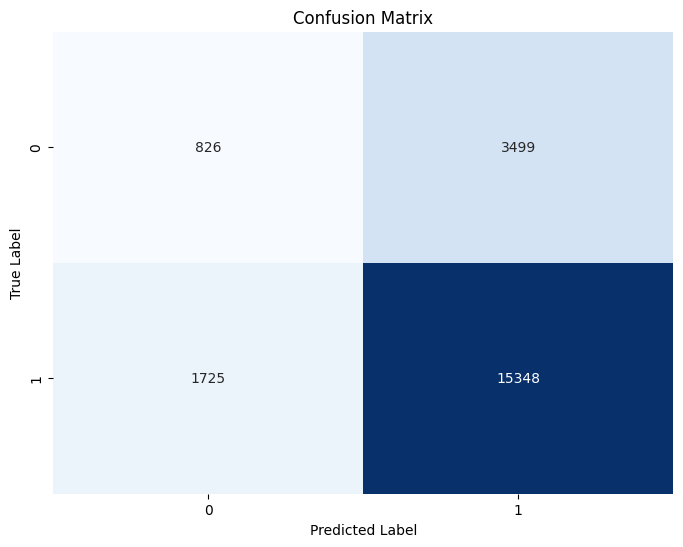

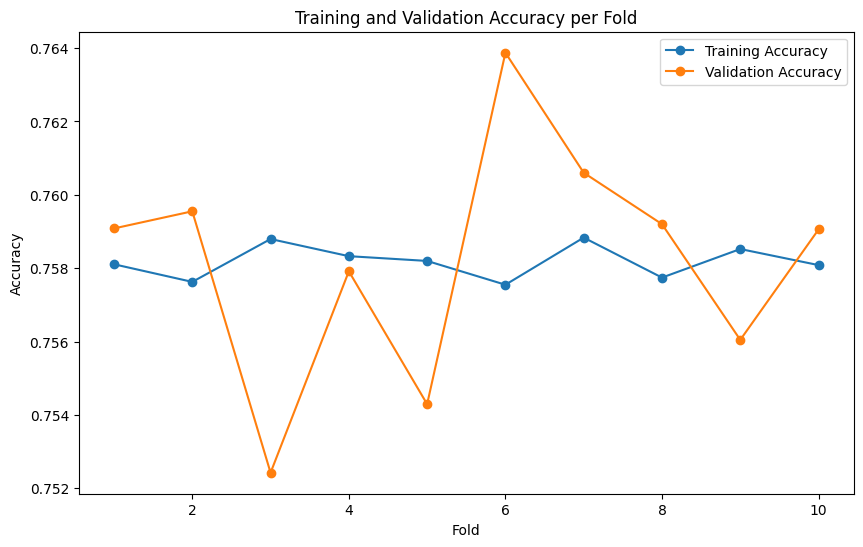

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Initialize lists to store accuracy scores
train_accuracies = []
val_accuracies = []

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Generate training and validation splits
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model to the training split
    gnb.fit(X_train_split, y_train_split)

    # Calculate accuracy on training split
    train_accuracy = accuracy_score(y_train_split, gnb.predict(X_train_split))
    train_accuracies.append(train_accuracy)

    # Calculate accuracy on validation split
    val_accuracy = accuracy_score(y_val_split, gnb.predict(X_val_split))
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the entire training set before final test evaluation
gnb.fit(X_train, y_train)

# Final evaluation on the test set
y_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# Linear Regression model

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.7935, Validation Accuracy = 0.7944
Fold 2: Train Accuracy = 0.7936, Validation Accuracy = 0.7932
Fold 3: Train Accuracy = 0.7937, Validation Accuracy = 0.7924
Fold 4: Train Accuracy = 0.7937, Validation Accuracy = 0.7926
Fold 5: Train Accuracy = 0.7937, Validation Accuracy = 0.7910
Fold 6: Train Accuracy = 0.7938, Validation Accuracy = 0.7968
Fold 7: Train Accuracy = 0.7940, Validation Accuracy = 0.7941
Fold 8: Train Accuracy = 0.7936, Validation Accuracy = 0.7940
Fold 9: Train Accuracy = 0.7937, Validation Accuracy = 0.7947
Fold 10: Train Accuracy = 0.7938, Validation Accuracy = 0.7931

Final Test Accuracy: 0.794606972614263

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.02      0.03      4325
           1       0.80      0.99      0.89     17073

    accuracy                           0.79     21398
 

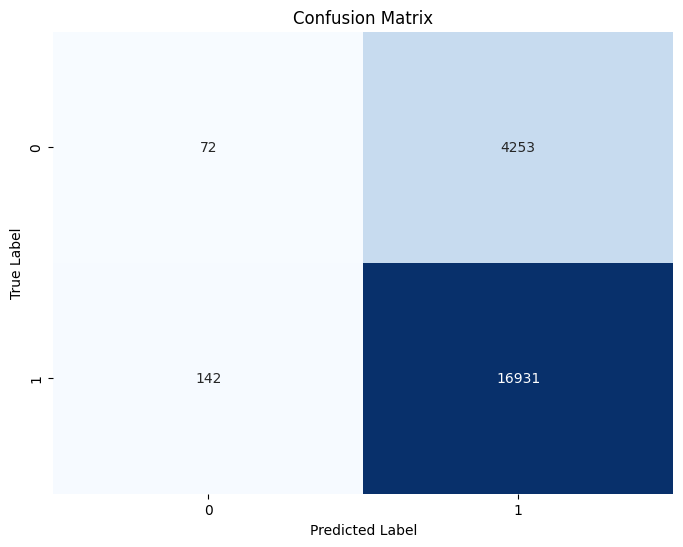

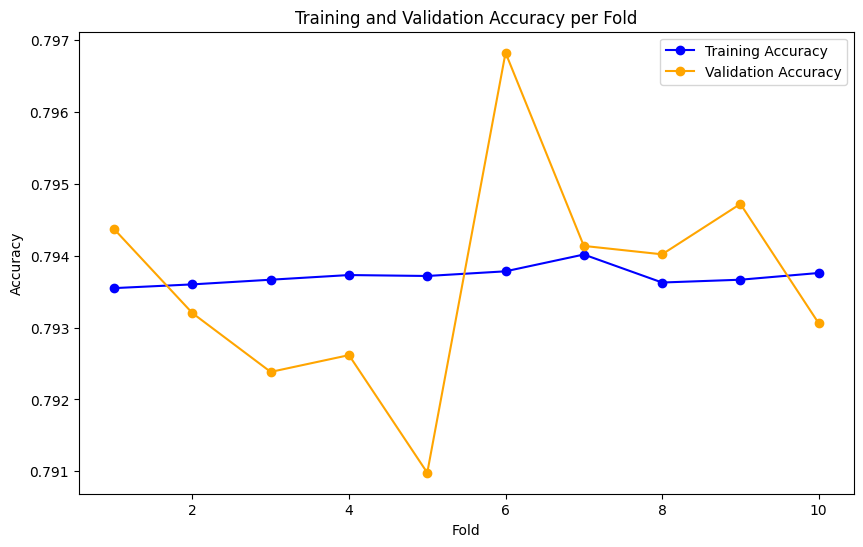

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    log_reg.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, log_reg.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, log_reg.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# Logistic Regression model

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.7935, Validation Accuracy = 0.7944
Fold 2: Train Accuracy = 0.7936, Validation Accuracy = 0.7932
Fold 3: Train Accuracy = 0.7937, Validation Accuracy = 0.7924
Fold 4: Train Accuracy = 0.7937, Validation Accuracy = 0.7926
Fold 5: Train Accuracy = 0.7937, Validation Accuracy = 0.7910
Fold 6: Train Accuracy = 0.7938, Validation Accuracy = 0.7968
Fold 7: Train Accuracy = 0.7940, Validation Accuracy = 0.7941
Fold 8: Train Accuracy = 0.7936, Validation Accuracy = 0.7940
Fold 9: Train Accuracy = 0.7937, Validation Accuracy = 0.7947
Fold 10: Train Accuracy = 0.7938, Validation Accuracy = 0.7931

Final Test Accuracy: 0.794606972614263

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.02      0.03      4325
           1       0.80      0.99      0.89     17073

    accuracy                           0.79     21398
 

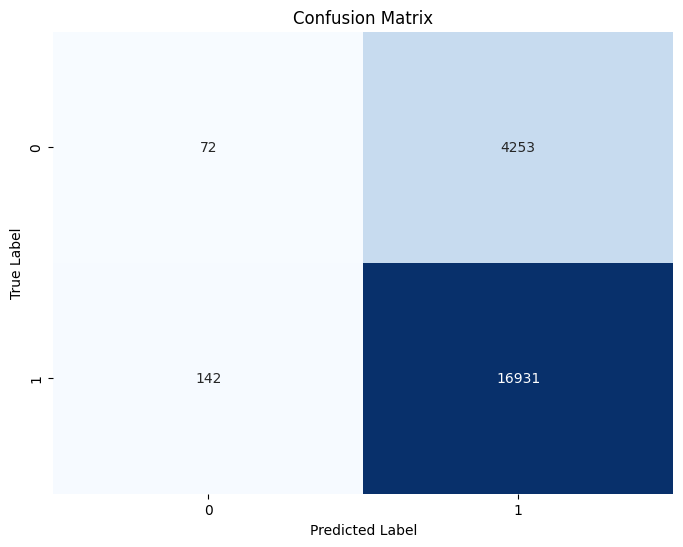

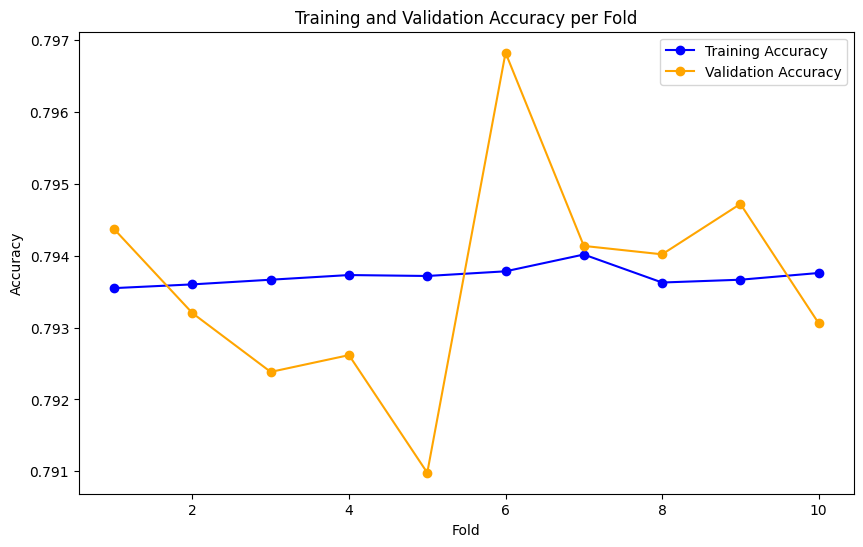

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    log_reg.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, log_reg.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, log_reg.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


#  Random Forest model

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.9680, Validation Accuracy = 0.7723
Fold 2: Train Accuracy = 0.9676, Validation Accuracy = 0.7645
Fold 3: Train Accuracy = 0.9676, Validation Accuracy = 0.7631
Fold 4: Train Accuracy = 0.9675, Validation Accuracy = 0.7696
Fold 5: Train Accuracy = 0.9676, Validation Accuracy = 0.7638
Fold 6: Train Accuracy = 0.9678, Validation Accuracy = 0.7643
Fold 7: Train Accuracy = 0.9677, Validation Accuracy = 0.7714
Fold 8: Train Accuracy = 0.9680, Validation Accuracy = 0.7615
Fold 9: Train Accuracy = 0.9680, Validation Accuracy = 0.7668
Fold 10: Train Accuracy = 0.9673, Validation Accuracy = 0.7704

Final Test Accuracy: 0.7637629685017291

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.22      0.27      4325
           1       0.82      0.90      0.86     17073

    accuracy                           0.76     21398


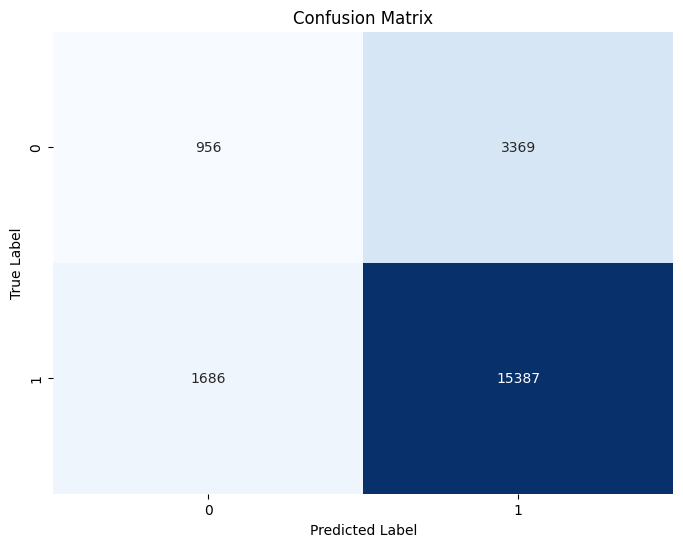

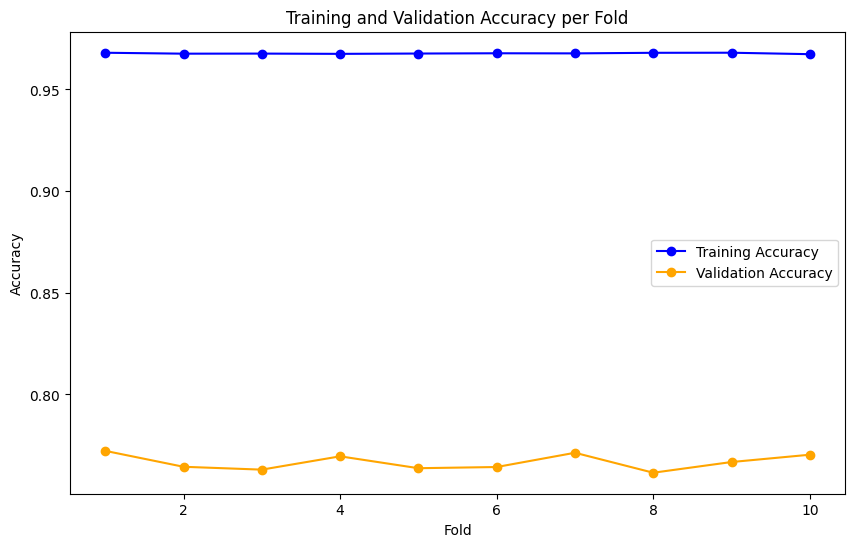

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    rf.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, rf.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, rf.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# KNN

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.8354, Validation Accuracy = 0.7735
Fold 2: Train Accuracy = 0.8358, Validation Accuracy = 0.7670
Fold 3: Train Accuracy = 0.8363, Validation Accuracy = 0.7692
Fold 4: Train Accuracy = 0.8351, Validation Accuracy = 0.7757
Fold 5: Train Accuracy = 0.8358, Validation Accuracy = 0.7688
Fold 6: Train Accuracy = 0.8359, Validation Accuracy = 0.7687
Fold 7: Train Accuracy = 0.8355, Validation Accuracy = 0.7744
Fold 8: Train Accuracy = 0.8349, Validation Accuracy = 0.7781
Fold 9: Train Accuracy = 0.8359, Validation Accuracy = 0.7738
Fold 10: Train Accuracy = 0.8357, Validation Accuracy = 0.7739

Final Test Accuracy: 0.7661931021590803

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.19      0.25      4325
           1       0.82      0.91      0.86     17073

    accuracy                           0.77     21398


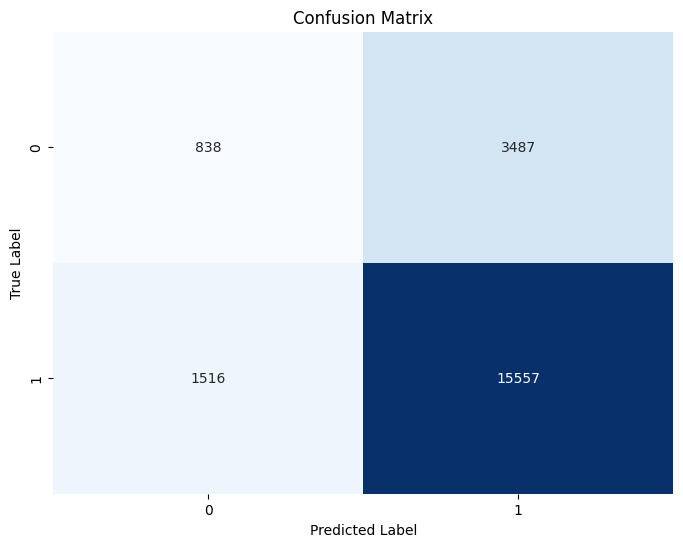

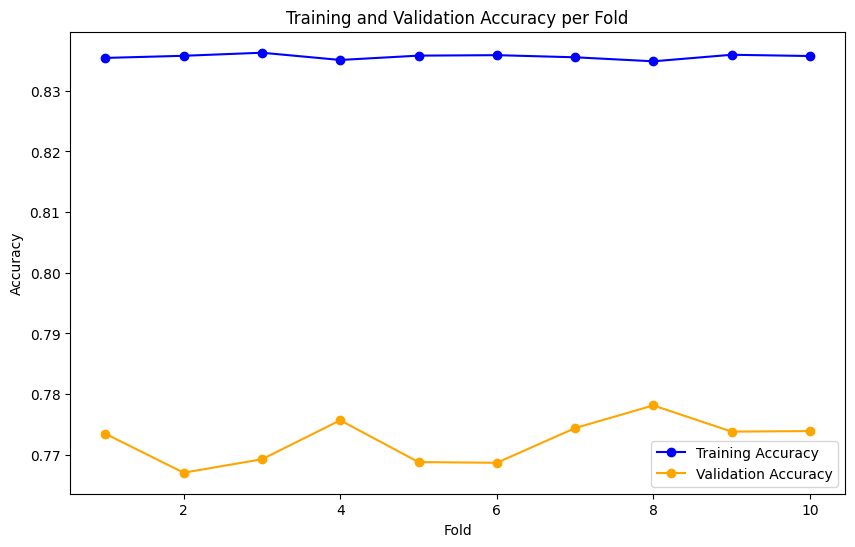

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors model with k=5 (you can adjust this based on your needs)
knn = KNeighborsClassifier(n_neighbors=5)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    knn.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, knn.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, knn.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# Gradient Boosting

Training and Validation Accuracies per Fold:
-------------------------------------------------
Fold 1: Train Accuracy = 0.7978, Validation Accuracy = 0.7975
Fold 2: Train Accuracy = 0.7978, Validation Accuracy = 0.7976
Fold 3: Train Accuracy = 0.7980, Validation Accuracy = 0.7972
Fold 4: Train Accuracy = 0.7978, Validation Accuracy = 0.7980
Fold 5: Train Accuracy = 0.7981, Validation Accuracy = 0.7972
Fold 6: Train Accuracy = 0.7981, Validation Accuracy = 0.7962
Fold 7: Train Accuracy = 0.7978, Validation Accuracy = 0.7971
Fold 8: Train Accuracy = 0.7979, Validation Accuracy = 0.7979
Fold 9: Train Accuracy = 0.7980, Validation Accuracy = 0.7973
Fold 10: Train Accuracy = 0.7978, Validation Accuracy = 0.7976

Final Test Accuracy: 0.7983456397794186

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.01      0.01      4325
           1       0.80      1.00      0.89     17073

    accuracy                           0.80     21398


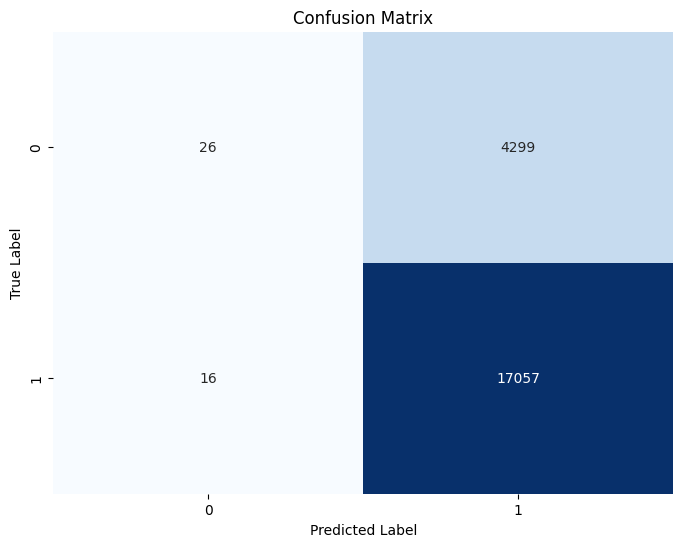

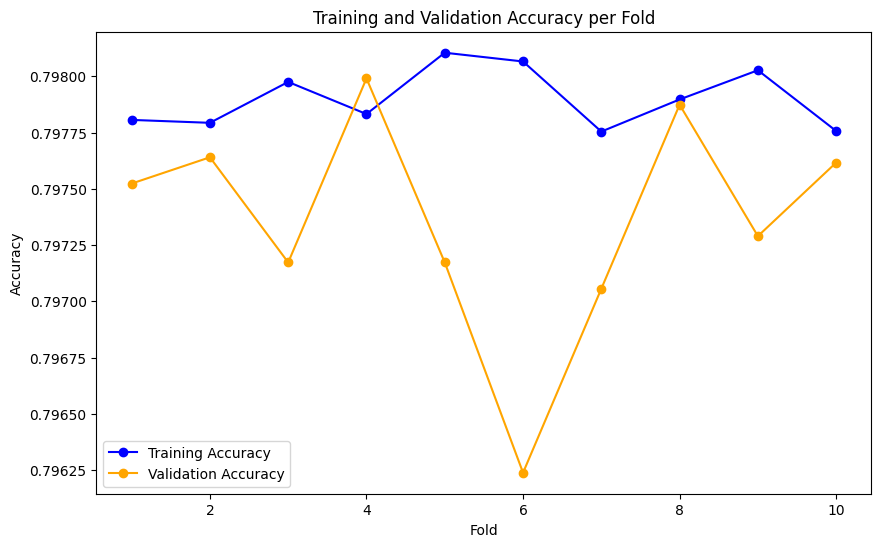

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    gbc.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, gbc.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, gbc.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# XGBoost

Training and Validation Accuracies per Fold:
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1: Train Accuracy = 0.8024, Validation Accuracy = 0.7974


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2: Train Accuracy = 0.8033, Validation Accuracy = 0.7965


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: Train Accuracy = 0.8036, Validation Accuracy = 0.7983


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4: Train Accuracy = 0.8032, Validation Accuracy = 0.7992


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5: Train Accuracy = 0.8030, Validation Accuracy = 0.7990


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 6: Train Accuracy = 0.8033, Validation Accuracy = 0.7959


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 7: Train Accuracy = 0.8027, Validation Accuracy = 0.7973


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 8: Train Accuracy = 0.8032, Validation Accuracy = 0.7993


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 9: Train Accuracy = 0.8031, Validation Accuracy = 0.8000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 10: Train Accuracy = 0.8032, Validation Accuracy = 0.7986


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final Test Accuracy: 0.7996541732872231

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.03      0.06      4325
           1       0.80      0.99      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.69      0.51      0.47     21398
weighted avg       0.76      0.80      0.72     21398


Confusion Matrix:
 [[  137  4188]
 [   99 16974]]
Confusion Matrix Shape: (2, 2)


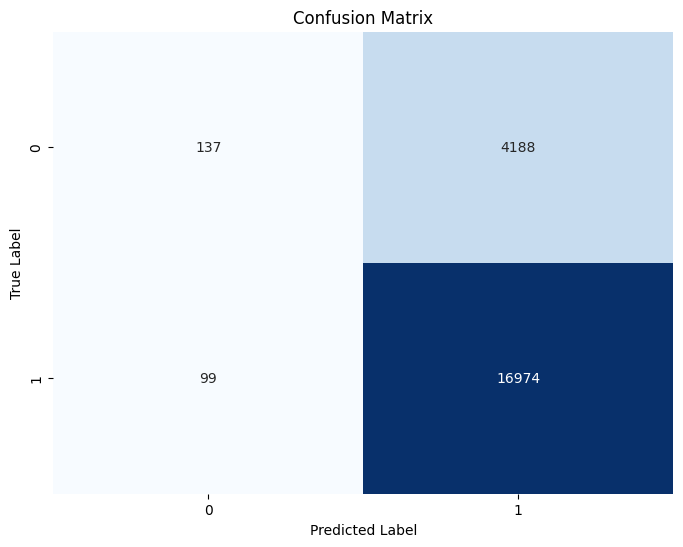

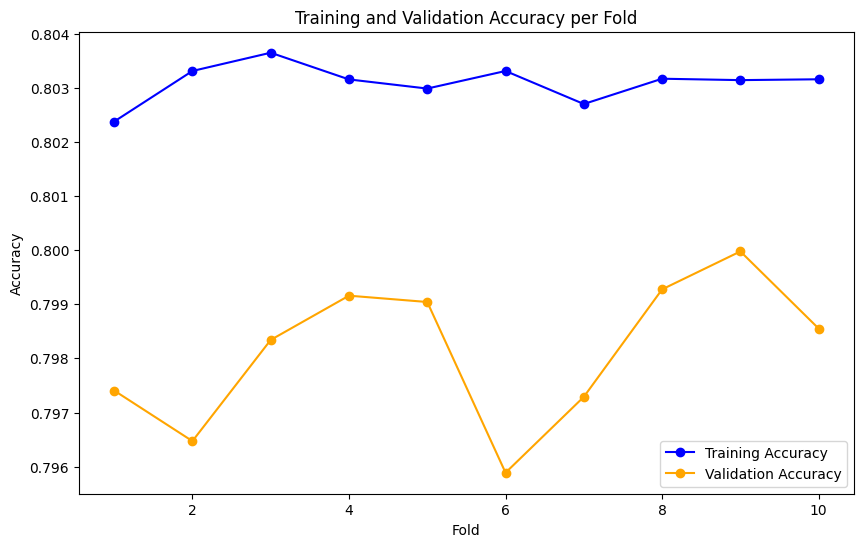

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features (X) and target (y)
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss", random_state=42)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Using Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Training and Validation Accuracies per Fold:")
print("-------------------------------------------------")

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    # Split the data into the current fold's training and validation sets
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current training split
    xgb.fit(X_train_split, y_train_split)

    # Calculate and store accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train_split, xgb.predict(X_train_split))
    val_accuracy = accuracy_score(y_val_split, xgb.predict(X_val_split))

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print the accuracy for this fold
    print(f"Fold {i}: Train Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Retrain on the full training set for final test evaluation
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Final evaluation
test_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix and its shape
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("Confusion Matrix Shape:", conf_matrix.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training and validation accuracies over folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Fold")
plt.legend()
plt.show()


# All Model report CSV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize a list to store the results
results = []

# Function to add model results to the list
def add_model_results(model_name, accuracy, conf_matrix, class_report):
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_val)
gnb_accuracy = accuracy_score(y_val, gnb_pred)
gnb_conf_matrix = confusion_matrix(y_val, gnb_pred)
gnb_class_report = classification_report(y_val, gnb_pred)

add_model_results('Gaussian Naive Bayes', gnb_accuracy, gnb_conf_matrix, gnb_class_report)

# 2. Linear Regression (for binary classification, rounding predictions)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_pred = lin_reg_model.predict(X_val)
lin_reg_pred_rounded = np.where(lin_reg_pred > 0.5, 1, 0)
lin_reg_accuracy = accuracy_score(y_val, lin_reg_pred_rounded)
lin_reg_conf_matrix = confusion_matrix(y_val, lin_reg_pred_rounded)
lin_reg_class_report = classification_report(y_val, lin_reg_pred_rounded)

add_model_results('Linear Regression', lin_reg_accuracy, lin_reg_conf_matrix, lin_reg_class_report)

# 3. Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_val)
log_reg_accuracy = accuracy_score(y_val, log_reg_pred)
log_reg_conf_matrix = confusion_matrix(y_val, log_reg_pred)
log_reg_class_report = classification_report(y_val, log_reg_pred)

add_model_results('Logistic Regression', log_reg_accuracy, log_reg_conf_matrix, log_reg_class_report)

# 4. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_pred)
rf_conf_matrix = confusion_matrix(y_val, rf_pred)
rf_class_report = classification_report(y_val, rf_pred)

add_model_results('Random Forest', rf_accuracy, rf_conf_matrix, rf_class_report)

# 5. KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_pred)
knn_conf_matrix = confusion_matrix(y_val, knn_pred)
knn_class_report = classification_report(y_val, knn_pred)

add_model_results('KNN', knn_accuracy, knn_conf_matrix, knn_class_report)

# 6. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_pred)
xgb_conf_matrix = confusion_matrix(y_val, xgb_pred)
xgb_class_report = classification_report(y_val, xgb_pred)

add_model_results('XGBoost', xgb_accuracy, xgb_conf_matrix, xgb_class_report)

# 7. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_val)
gb_accuracy = accuracy_score(y_val, gb_pred)
gb_conf_matrix = confusion_matrix(y_val, gb_pred)
gb_class_report = classification_report(y_val, gb_pred)

add_model_results('Gradient Boosting', gb_accuracy, gb_conf_matrix, gb_class_report)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/IDS/model_performance_metrics.csv', index=False)

print("Model performance metrics saved to CSV.")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model performance metrics saved to CSV.


# Best Model

In [ ]:
import pandas as pd

# Load the model  performance metrics from the CSV file
results_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDS/model_performance_metrics.csv')

# Convert the Accuracy column to numeric for comparison
results_df['Accuracy'] = pd.to_numeric(results_df['Accuracy'], errors='coerce')

# Find the model with the highest accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

# Display the best model's information
print("Best Performing Model:")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_model['Confusion Matrix']}")
print(f"Classification Report:\n{best_model['Classification Report']}")


Best Performing Model:
Model: Gradient Boosting
Accuracy: 0.7983
Confusion Matrix:
[[   26  4299]
 [   16 17057]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.01      0.01      4325
           1       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.71      0.50      0.45     21398
weighted avg       0.76      0.80      0.71     21398

